# Учим VGG-Unet-with-crop по 3-м каналам с BN на входе

метод оптимизации SGD momentum

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=0.7):
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


KTF.set_session(get_session())

In [4]:
!nvidia-smi

Sun Nov 26 08:23:49 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    69W / 149W |  11333MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [45]:
import os
import re
import json

import unet
import dataset
import train_test_loader
import learning_experiment as lexperiment

import datetime

from shutil import copyfile

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
net = unet.VGGUnetModelWithCrop(N=20)

In [48]:
net.net_description

{'N': 20,
 'input_shape': (324, 324, 3),
 'name': 'vgg-unet-with-crop',
 'output_shape': (116, 116, 1)}

In [55]:
DESCRIPTION = u"""
Учим VGG-Unet-with-crop по 3м каналам RGB с BN на входе с помощью SGD с моментом
Experiment_2017_11_26_22
"""
experiment = lexperiment.create_experiment(DESCRIPTION, 
                               dataset.DataSet("./dataset/trainset", [dataset.ChannelRGB_PanSharpen]))

Create experiment in directory: ./experiments/2017-11-26 09:26:10.412141


In [57]:
data_set = experiment.data_set

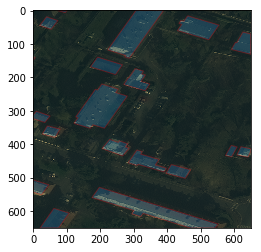

In [23]:
data_set.draw(data_set.test_ids[30])

In [58]:
net.load_vgg_weights()

In [59]:
for l in net.vgg_layers:
    l.trainable = False

In [60]:
from keras.optimizers import Adam, Nadam, SGD

net.compile(optimizer=SGD(lr=1e-3, momentum=0.95), loss='binary_crossentropy')

In [61]:
batch_generator = lexperiment.BatchGenerator(data_set, data_set.train_ids, shuffle_on_each_epoch=True, 
                                             input_size=net.input_shape[1], crop=104, random_rotation_amplitude=5)

In [62]:
experiment.train(net, batch_generator, epochs=60)

epoch: 0, loss: 0.740126
epoch: 0, loss: 0.711449
epoch: 0, loss: 0.668989
epoch: 0, loss: 0.637248
epoch: 0, loss: 0.608954
epoch: 0, loss: 0.557237
epoch: 0, loss: 0.554726
epoch: 0, loss: 0.458937
epoch: 0, loss: 0.456892
epoch: 0, loss: 0.393764
epoch: 0, loss: 0.420430
epoch: 0, loss: 0.341985
epoch: 0, loss: 0.487035
epoch: 0, loss: 0.426535
epoch: 0, loss: 0.312805
epoch: 0, loss: 0.258656
epoch: 0, loss: 0.279514
epoch: 0, loss: 0.382731
epoch: 0, loss: 0.263553
epoch: 0, loss: 0.292153
epoch: 0, loss: 0.313143
epoch: 0, loss: 0.369277
epoch: 0, loss: 0.141488
epoch: 0, loss: 0.078225
epoch: 0, loss: 0.329993
epoch: 0, loss: 0.128109
epoch: 0, loss: 0.112509
epoch: 0, loss: 0.092195
epoch: 0, loss: 0.560037
epoch: 0, loss: 0.356781
epoch: 0, loss: 0.282028
epoch: 0, loss: 0.252485
epoch: 0, loss: 0.191791
epoch: 0, loss: 0.311018
epoch: 0, loss: 0.204077
epoch: 0, loss: 0.127818
epoch: 0, loss: 0.416960
epoch: 0, loss: 0.198819
epoch: 0, loss: 0.216178
epoch: 0, loss: 0.228261


epoch: 5, loss: 0.103122
epoch: 5, loss: 0.035927
epoch: 5, loss: 0.124605
epoch: 5, loss: 0.066338
epoch: 5, loss: 0.085018
epoch: 5, loss: 0.078502
epoch: 5, loss: 0.112368
epoch: 5, loss: 0.104626
epoch: 5, loss: 0.155528
epoch: 5, loss: 0.097971
epoch: 5, loss: 0.056494
epoch: 5, loss: 0.278004
epoch: 5, loss: 0.027455
epoch: 5, loss: 0.043685
epoch: 5, loss: 0.045285
epoch: 5, loss: 0.072291
epoch: 5, loss: 0.056260
epoch: 5, loss: 0.053071
epoch: 5, loss: 0.282334
epoch: 5, loss: 0.088759
epoch: 5, loss: 0.138709
epoch: 5, loss: 0.083431
epoch: 5, loss: 0.119771
epoch: 5, loss: 0.130272
epoch: 5, loss: 0.139792
epoch: 5, loss: 0.091611
epoch: 5, loss: 0.068024
epoch: 5, loss: 0.053314
epoch: 5, loss: 0.091545
epoch: 5, loss: 0.056531
epoch: 5, loss: 0.116855
epoch: 5, loss: 0.103334
epoch: 5, loss: 0.057551
epoch: 5, loss: 0.079521
epoch: 5, loss: 0.113333
epoch: 5, loss: 0.057633
epoch: 5, loss: 0.084511
epoch: 5, loss: 0.118922
epoch: 5, loss: 0.218953
epoch: 5, loss: 0.318925


epoch: 10, loss: 0.091073
epoch: 10, loss: 0.067241
epoch: 10, loss: 0.154247
epoch: 10, loss: 0.125283
epoch: 10, loss: 0.090078
epoch: 10, loss: 0.061957
epoch: 10, loss: 0.187582
epoch: 10, loss: 0.085188
epoch: 10, loss: 0.142760
epoch: 10, loss: 0.047020
epoch: 10, loss: 0.222412
epoch: 10, loss: 0.062878
epoch: 10, loss: 0.302776
epoch: 10, loss: 0.136734
epoch: 10, loss: 0.116490
epoch: 10, loss: 0.084588
epoch: 10, loss: 0.132938
epoch: 10, loss: 0.163577
epoch: 10, loss: 0.090232
epoch: 10, loss: 0.087092
epoch: 10, loss: 0.047434
epoch: 10, loss: 0.041739
epoch: 10, loss: 0.038994
epoch: 10, loss: 0.046449
epoch: 10, loss: 0.068212
epoch: 10, loss: 0.088941
epoch: 10, loss: 0.075320
epoch: 10, loss: 0.067411
epoch: 10, loss: 0.154350
epoch: 10, loss: 0.103690
epoch: 10, loss: 0.088353
epoch: 10, loss: 0.041335
epoch: 10, loss: 0.147679
epoch: 10, loss: 0.109343
epoch: 10, loss: 0.086780
epoch: 10, loss: 0.092259
epoch: 10, loss: 0.055968
epoch: 10, loss: 0.069700
epoch: 10, l

epoch: 14, loss: 0.112307
epoch: 14, loss: 0.047482
epoch: 14, loss: 0.021800
epoch: 15, loss: 0.128103
epoch: 15, loss: 0.173606
epoch: 15, loss: 0.165406
epoch: 15, loss: 0.277865
epoch: 15, loss: 0.101630
epoch: 15, loss: 0.060148
epoch: 15, loss: 0.028643
epoch: 15, loss: 0.046648
epoch: 15, loss: 0.088519
epoch: 15, loss: 0.039752
epoch: 15, loss: 0.195064
epoch: 15, loss: 0.102194
epoch: 15, loss: 0.096811
epoch: 15, loss: 0.105338
epoch: 15, loss: 0.127252
epoch: 15, loss: 0.053276
epoch: 15, loss: 0.070567
epoch: 15, loss: 0.056537
epoch: 15, loss: 0.080553
epoch: 15, loss: 0.099330
epoch: 15, loss: 0.052400
epoch: 15, loss: 0.079097
epoch: 15, loss: 0.128973
epoch: 15, loss: 0.043599
epoch: 15, loss: 0.157457
epoch: 15, loss: 0.069157
epoch: 15, loss: 0.082690
epoch: 15, loss: 0.070398
epoch: 15, loss: 0.114194
epoch: 15, loss: 0.126772
epoch: 15, loss: 0.103799
epoch: 15, loss: 0.026692
epoch: 15, loss: 0.091747
epoch: 15, loss: 0.040582
epoch: 15, loss: 0.012441
epoch: 15, l

epoch: 19, loss: 0.165977
epoch: 19, loss: 0.045736
epoch: 19, loss: 0.063312
epoch: 19, loss: 0.042472
epoch: 19, loss: 0.036902
epoch: 19, loss: 0.048432
epoch: 19, loss: 0.079682
epoch: 19, loss: 0.092280
epoch: 19, loss: 0.155763
epoch: 19, loss: 0.045463
epoch: 19, loss: 0.108372
epoch: 19, loss: 0.048277
epoch: 20, loss: 0.060069
epoch: 20, loss: 0.079372
epoch: 20, loss: 0.044509
epoch: 20, loss: 0.119846
epoch: 20, loss: 0.075495
epoch: 20, loss: 0.040737
epoch: 20, loss: 0.067058
epoch: 20, loss: 0.056143
epoch: 20, loss: 0.074501
epoch: 20, loss: 0.106653
epoch: 20, loss: 0.049499
epoch: 20, loss: 0.110484
epoch: 20, loss: 0.050993
epoch: 20, loss: 0.023735
epoch: 20, loss: 0.105864
epoch: 20, loss: 0.064996
epoch: 20, loss: 0.043885
epoch: 20, loss: 0.098266
epoch: 20, loss: 0.044749
epoch: 20, loss: 0.074267
epoch: 20, loss: 0.035061
epoch: 20, loss: 0.043902
epoch: 20, loss: 0.104456
epoch: 20, loss: 0.046294
epoch: 20, loss: 0.039174
epoch: 20, loss: 0.107197
epoch: 20, l

epoch: 24, loss: 0.104577
epoch: 24, loss: 0.068426
epoch: 24, loss: 0.073991
epoch: 24, loss: 0.040124
epoch: 24, loss: 0.081666
epoch: 24, loss: 0.013809
epoch: 24, loss: 0.078718
epoch: 24, loss: 0.054339
epoch: 24, loss: 0.109570
epoch: 24, loss: 0.222125
epoch: 24, loss: 0.089621
epoch: 24, loss: 0.041098
epoch: 24, loss: 0.104265
epoch: 24, loss: 0.029656
epoch: 24, loss: 0.038744
epoch: 24, loss: 0.180827
epoch: 24, loss: 0.035792
epoch: 24, loss: 0.100374
epoch: 24, loss: 0.046958
epoch: 24, loss: 0.099683
epoch: 24, loss: 0.066869
epoch: 25, loss: 0.055820
epoch: 25, loss: 0.154686
epoch: 25, loss: 0.031686
epoch: 25, loss: 0.118368
epoch: 25, loss: 0.110695
epoch: 25, loss: 0.084553
epoch: 25, loss: 0.072027
epoch: 25, loss: 0.095070
epoch: 25, loss: 0.061120
epoch: 25, loss: 0.070112
epoch: 25, loss: 0.128686
epoch: 25, loss: 0.082841
epoch: 25, loss: 0.069927
epoch: 25, loss: 0.068433
epoch: 25, loss: 0.054478
epoch: 25, loss: 0.037483
epoch: 25, loss: 0.027534
epoch: 25, l

epoch: 29, loss: 0.038375
epoch: 29, loss: 0.016328
epoch: 29, loss: 0.043962
epoch: 29, loss: 0.067933
epoch: 29, loss: 0.137721
epoch: 29, loss: 0.102533
epoch: 29, loss: 0.042082
epoch: 29, loss: 0.044611
epoch: 29, loss: 0.058399
epoch: 29, loss: 0.065670
epoch: 29, loss: 0.171434
epoch: 29, loss: 0.047252
epoch: 29, loss: 0.169936
epoch: 29, loss: 0.052511
epoch: 29, loss: 0.085236
epoch: 29, loss: 0.064712
epoch: 29, loss: 0.061180
epoch: 29, loss: 0.057882
epoch: 29, loss: 0.046369
epoch: 29, loss: 0.033087
epoch: 29, loss: 0.064545
epoch: 29, loss: 0.049516
epoch: 29, loss: 0.030127
epoch: 29, loss: 0.091963
epoch: 29, loss: 0.049190
epoch: 29, loss: 0.235194
epoch: 29, loss: 0.098389
epoch: 29, loss: 0.078898
epoch: 29, loss: 0.024393
epoch: 29, loss: 0.097206
epoch: 30, loss: 0.094219
epoch: 30, loss: 0.095691
epoch: 30, loss: 0.045562
epoch: 30, loss: 0.289925
epoch: 30, loss: 0.039371
epoch: 30, loss: 0.104320
epoch: 30, loss: 0.052503
epoch: 30, loss: 0.236609
epoch: 30, l

KeyboardInterrupt: 

In [43]:
net.optimizer.lr.assign(1e-3)

<tf.Tensor 'Assign_210:0' shape=() dtype=float32_ref>